# Multivariate Regression

In this notebook we will build several multivariate models based on the advertising dataset.

We will assess the reliability of the models from the pvalues of the coefficients
and select the best model based on

* the R-squared
* the log-likelihood,
* the AIC and BIC criteria
* and the F-statistic and its associated p-value

We will also interpret the **QQ-plots** for these different linear regression models.

So let's import the necessary packages and load the advertising dataset into a dataframe



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

df = pd.read_csv('./data/advertising.csv')

df.shape

(200, 4)

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Let's start by fitting a model that takes into account all 3 predictors

In [5]:
M1 = 'Sales ~ TV + Radio + Newspaper'

result1 = smf.ols(M1, data = df).fit()
print(result1.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           1.58e-96
Time:                        15:41:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

As we can see, the p-value of the Newspaper coefficient is well above the 0.05 threshold.


In [11]:
print("Coefficients: {:.5f}".format(result1.params['Newspaper']))

print("P-values: {:.2f}".format(result1.pvalues['Newspaper']))

Coefficients: -0.00104
P-values: 0.86


The Newspaper predictor is not reliable.

So let's remove this Newspaper predictor and consider a second model with just TV and Radio


In [13]:
M2 = 'Sales ~ TV + Radio'
result2 = smf.ols(M2, data = df).fit()
print(result2.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           4.83e-98
Time:                        15:43:25   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

We can see that when we compare model 1 with model 2, the R-squared has not changed a bit
at 0.897


In [14]:
print("M1 R-squared: {:.3f} \t M2 R-squared: {:.3f} ".format(result1.rsquared, result2.rsquared ))



M1 R-squared: 0.897 	 M2 R-squared: 0.897 


Removing the Newspaper variable seems to be the right thing to do
since it doesn't add any information to the model.


## Interaction terms

However there is such a thing as interaction terms between predictors.

A significant interaction between 2 predictors means that
the influence of the first predictor
is dependent on the values of the second predictor.

For instance the effect of Newspaper on Sales will be different
if we spend a little or if we spend a lot on TV.

To add interaction terms, we define can the model as



In [15]:
M3 =  'Sales ~ Radio + TV * Newspaper'

This will assign 4 predictors to the model:

* Radio, 
* TV, 
* Newspaper

and 
* TV:Newspaper: the interaction term between TV and Newspaper.


In [19]:
result3 = smf.ols(M3, data = df).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     456.2
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           9.06e-98
Time:                        15:45:32   Log-Likelihood:                -379.90
No. Observations:                 200   AIC:                             769.8
Df Residuals:                     195   BIC:                             786.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.8731      0.401      9.655      0.000       3.082       4.664
Radio            0.1901      0.008     22.692      0.000       0.174       0.207
TV               0.0393      0.002     17.312      0.000       0.035       0.044
Newspaper       -0.0320      0.010     -3.074      0.002      -0.053      -0.011
TV:Newspaper     0.0002   5.68e-05      3.554      0.000    8.98e-05       0.000
==============================================================================
Omnibus:                       78.746   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.193
Skew:                          -1.542   Prob(JB):                     3.24e-67
Kurtosis:                       8.218   Cond. No.                     2.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With this model, we can see that:

* Newspaper is now a reliable coefficient with a p-value below 0.05

* The Newspaper and TV coefficients roughly compensate each other as one is positive and the other negative

* And although the coefficient for the Newspaper TV interaction term is small adding it to the model makes the Newspaper predictor more reliable.


We can also consider the interaction between Radio and TV with the model


In [20]:
M4 = 'Sales ~ TV * Radio'

This also gives a reliable model

In [22]:
result4 = smf.ols(M3, data = df).fit()
result4.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     456.2
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           9.06e-98
Time:                        15:46:16   Log-Likelihood:                -379.90
No. Observations:                 200   AIC:                             769.8
Df Residuals:                     195   BIC:                             786.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.8731      0.401      9.655      0.000       3.082       4.664
Radio            0.1901      0.008     22.692      0.000       0.174       0.207
TV               0.0393      0.002     17.312      0.000       0.035       0.044
Newspaper       -0.0320      0.010     -3.074      0.002      -0.053      -0.011
TV:Newspaper     0.0002   5.68e-05      3.554      0.000    8.98e-05       0.000
==============================================================================
Omnibus:                       78.746   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.193
Skew:                          -1.542   Prob(JB):                     3.24e-67
Kurtosis:                       8.218   Cond. No.                     2.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
result4.pvalues

Intercept       2.840551e-18
Radio           1.287349e-56
TV              2.770958e-41
Newspaper       2.413379e-03
TV:Newspaper    4.759990e-04
dtype: float64

## Our models so far
Let's now consider the 4 following models:


In [25]:
formulas = [
    'Sales ~ TV + Radio + Newspaper',
    'Sales ~ TV + Radio ',
    'Sales ~ Radio + TV*Newspaper',
    'Sales ~ Radio * TV',
    ]



and let's find out which model is the best

We can loop over that list of models, each time fitting the regression,
and printing the values of the standard regression metrics


In [28]:
for formula in formulas:
    # fit the model
    result = smf.ols(formula, data = df).fit()
    # regression metrics
    print("\n\n-- {}\n".format(formula))
    print("   R^2    {:.4f} \t Adj. R^2 {:.4f}".format(result.rsquared,result.rsquared_adj ))
    print("   F stat {:.4f} \t F-proba  {:.4f} ".format(result.fvalue, result.f_pvalue))
    print("   AIC    {:.4f} \t BIC      {:.4f} ".format(result.aic, result.bic))
    print("   Log Likelihood {:.4f} ".format(result.llf))




-- Sales ~ TV + Radio + Newspaper

   R^2    0.8972 	 Adj. R^2 0.8956
   F stat 570.2707 	 F-proba  0.0000 
   AIC    780.3622 	 BIC      793.5555 
   Log Likelihood -386.1811 


-- Sales ~ TV + Radio 

   R^2    0.8972 	 Adj. R^2 0.8962
   F stat 859.6177 	 F-proba  0.0000 
   AIC    778.3941 	 BIC      788.2891 
   Log Likelihood -386.1970 


-- Sales ~ Radio + TV*Newspaper

   R^2    0.9035 	 Adj. R^2 0.9015
   F stat 456.2410 	 F-proba  0.0000 
   AIC    769.8098 	 BIC      786.3014 
   Log Likelihood -379.9049 


-- Sales ~ Radio * TV

   R^2    0.9678 	 Adj. R^2 0.9673
   F stat 1963.0569 	 F-proba  0.0000 
   AIC    548.2778 	 BIC      561.4711 
   Log Likelihood -270.1389 


The F statistic p-value of all the models is well below 0.05.
Which means that all these models are better than a simple constant with no predictors at all.


We've already seen that the 2 first models are very much equivalent in terms of R^2 and log likelihood.

The 3rd model that includes the TV:Newspaper interaction term is better than the 2 first with higher R-squared, log likelihood and lower AIC and BIC


Finally, the 4th model is by far the best model we've designed so far
with an R-squared of 0.96



## QQ plot: normal residuals

The QQ plot tells us if the residuals of a model are normally distributed
A necessary outcome of a good model.


Let's look at the QQ plot for our best model.


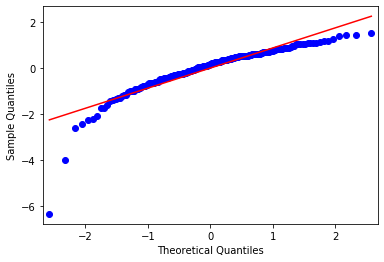

In [29]:
result4 = smf.ols('Sales ~ TV * Radio', data = df).fit()
sm.qqplot(result4.resid, line='r');


The points of the quantile plot are not well aligned with the straight line
which indicates that there is still some information in the dataset that could be exploited
to build a more efficient model.

For reasons we will see in the next chapter, the sqrt of the TV variable ends up being a better predictor than TV itself.
So consider now the model


In [32]:
M5 = 'Sales ~  Radio * np.sqrt(TV)'
result = smf.ols('Sales ~  Radio * np.sqrt(TV)', data = df).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     8949.
Date:                Thu, 18 Jul 2019   Prob (F-statistic):          2.23e-209
Time:                        15:48:36   Log-Likelihood:                -120.98
No. Observations:                 200   AIC:                             250.0
Df Residuals:                     196   BIC:                             263.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.4444      0.179     24.778      0.000       4.091       4.798
Radio                -0.0501      0.006     -7.997      0.000      -0.062      -0.038
np.sqrt(TV)           0.4384      0.015     29.183      0.000       0.409       0.468
Radio:np.sqrt(TV)     0.0215      0.001     41.538      0.000       0.020       0.023
==============================================================================
Omnibus:                       35.531   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.449
Skew:                          -0.733   Prob(JB):                     6.90e-22
Kurtosis:                       6.089   Cond. No.                     1.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

which results in an r-squared of 0.99

And this time the residuals are normally distributed
as shown by the QQ plot


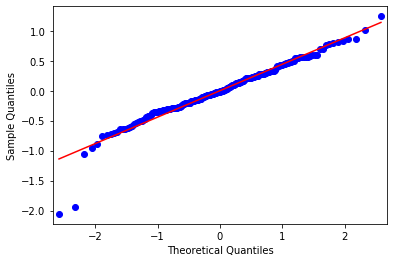

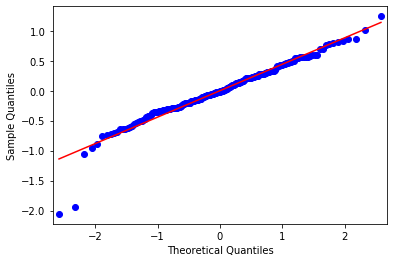

In [33]:
sm.qqplot(result.resid, line='r')

This is confirmed by the KS test


In [34]:
from scipy import stats
x = (result.resid - np.mean(result.resid)) / np.std(result.resid)
stats.kstest(x , 'norm')


KstestResult(statistic=0.06909128154817029, pvalue=0.28300214853637035)

With a pvalue=0.28 we cannot reject the null hypothesis that the residuals are notmally distributed.

And we can conclude that residuals are close to being normally distributed.


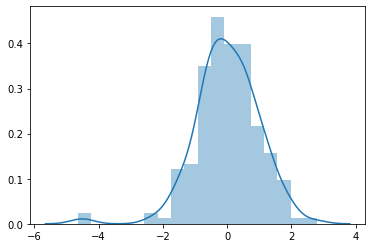

In [35]:
sns.distplot(x)